Name: bharath S
Reg no: 212225230031
Ridge - Mean Squared Error: 0.26,R2 Score: 0.79
Lasso - Mean Squared Error: 0.94,R2 Score: 0.25
ElasticNet - Mean Squared Error: 0.63,R2 Score: 0.49


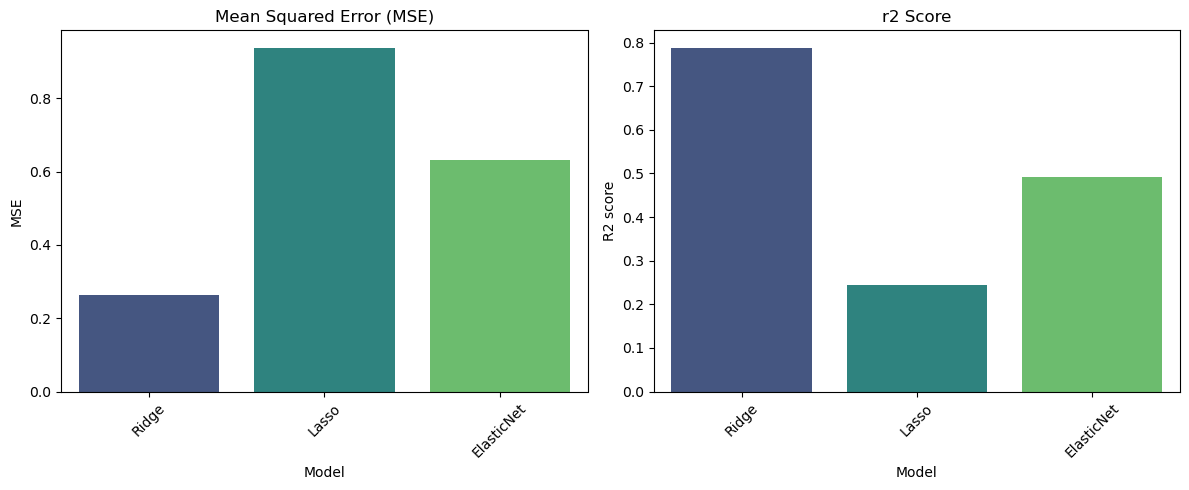

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("encoded_car_data (1).csv")
data.head

#data processing
#data=drop([carname,car id],axis=1)
data=pd.get_dummies(data,drop_first=True)
x=data.drop('price',axis=1)
y=data['price']

scaler=StandardScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y.values.reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

models={
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=1.0),
    'ElasticNet': ElasticNet(alpha=1.0,l1_ratio=0.5)
}
results={}

for name,model in models.items():
    pipeline=Pipeline([
        ("poly",PolynomialFeatures(degree=2)),
        ('regressor',model)
    ])
    pipeline.fit(x_train,y_train)
    predictions=pipeline.predict(x_test)
    mse=mean_squared_error(y_test,predictions)
    r2=r2_score(y_test,predictions)
    results[name]={'MSE':mse,"r2 Score":r2}

print("Name: bharath S")
print("Reg no: 212225230031")

for model_name, metrics in results.items():
    print(f"{model_name} - Mean Squared Error: {metrics['MSE']:.2f},R2 Score: {metrics['r2 Score']:.2f}")

    
results_df=pd.DataFrame(results).T
results_df.reset_index(inplace=True)
results_df.rename(columns={'index': 'Model'},inplace=True)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='Model',y='MSE',data=results_df,palette='viridis')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(x='Model',y='r2 Score',data=results_df,palette='viridis')
plt.title('r2 Score')
plt.ylabel('R2 score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()